<a href="https://colab.research.google.com/github/Sapire2003/Project-Portfolio/blob/Data-Analysis/Document_to_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC-206: Text Analytics
# Noah Sapire


## Assignment 7: Text Analytics Tools

In this assignment you'll be practicing with the concepts covered in class, *although in this notebook, I'm going beyond what you've seen in class.* For each write up requested below, I want you to add your own text cell and write it up there.

There are NO prizes for short, concise code where readability is impacted. However you're free to use concepts and code I use in class.

ALWAYS print nicely.

**BEFORE HANDING IN THIS NOTEBOOK - REMOVE MY EXAMPLE CODE AND GRAPHS. ONLY SUBMIT CODE THAT ANSWERS MY QUESTIONS. Put all library imports and resource downloads as the first code cell in your notebook**



### Part 1: Are you positive?

We're going to generate a graph like last week, using the inaugural address corpus included with the NLTK.

This time, for every sentence inside every speech, we're going to record if it's a positive sentence, or a negative sentence.

How?

Well, in class we did some work extracting positive and negative adjectives from the movie review corpus. Several people have explored this issue in much greater depth, and created tools and lexicons (basically lists of words), that can be used to assess if a particular passage of text is positive, negative or neutral.

The resource we're going to use is called VADER (**V**alence **A**ware **D**ictionary for s**E**ntiment and **R**easoning - CS is ALL about coming up with cool acronyms) and it's accesible through the NLTK.

If you want to read more about the VADER software, the paper is here: http://eegilbert.org/papers/icwsm14.vader.hutto.pdf

First I'll show you how to use it, and then give you a task.

In [ ]:
# Loading NLTK and resources

import nltk


In [ ]:
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('inaugural')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

(a) I want to know about the positivity and negativity of inaugural speeches. Start by thinking - do you imagine inaugural address speeches will be mostly positive, negative or neutral?

We're going to find out. Here's how we'll do it:
* Look back at the last assignment to see how to get the file IDs
* Get the raw text of each speech. You've already used the .words method to get the word tokens from a speech. Each speech has a .raw method, that will give you the raw text.
* Split that text into sentences, using sent_tokenize
* Analyze each sentence for sentiment - looking only at the compound value. If the value of compound is greater than 0.05, consider it a positive sentence. If it's less than -0.05, consider it a negative sentence.
* For each speech, I want to know the *proportion* of positive and negative sentences over the whole speech. So if ALL the sentences in a given speech are positive, the positive proportion should be 100 and the negative will be 0.
* On a line plot, graph the proportion of positive sentences AND the proportion of negative sentences for every speech
* Label the graph properly, including a legend

Also answer the following questions:
1. Are there any times in history when inaugural speeches have been more negative than positive? If yes, what was happening at that time? If no, when comes the closest?

2. Look at the SIX lowest points in positivity in the graph. What is happening in each timeframe that could account for this? Who was the president at the time of each of those 6 speeches?

In [ ]:
from nltk.corpus import inaugural
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[78.26086956521739, 25.0, 75.67567567567568, 58.536585365853654, 71.11111111111111, 76.19047619047619, 45.45454545454545, 77.04918032786885, 70.54263565891473, 68.91891891891892, 88.0, 75.86206896551724, 66.3157894736842, 60.476190476190474, 66.01307189542483, 86.36363636363636, 64.42307692307693, 66.29213483146067, 40.74074074074074, 38.46153846153847, 87.5, 72.09302325581395, 81.35593220338984, 63.96396396396396, 77.27272727272727, 65.60509554140127, 70.6896551724138, 74.61538461538461, 55.00000000000001, 66.66666666666666, 69.18238993710692, 58.82352941176471, 45.76271186440678, 54.729729729729726, 63.26530612244898, 60.12658227848101, 57.647058823529406, 53.125, 51.470588235294116, 69.23076923076923, 71.55172413793103, 66.38655462184873, 67.3913043478261, 55.769230769230774, 41.48936170212766, 54.36893203883495, 67.64705882352942, 84.61538461538461, 54.330708661417326, 57.25806451612904, 58.74125874125874, 55.55555555555556, 59.45945945945946, 59.79381443298969, 72.63157894736842, 

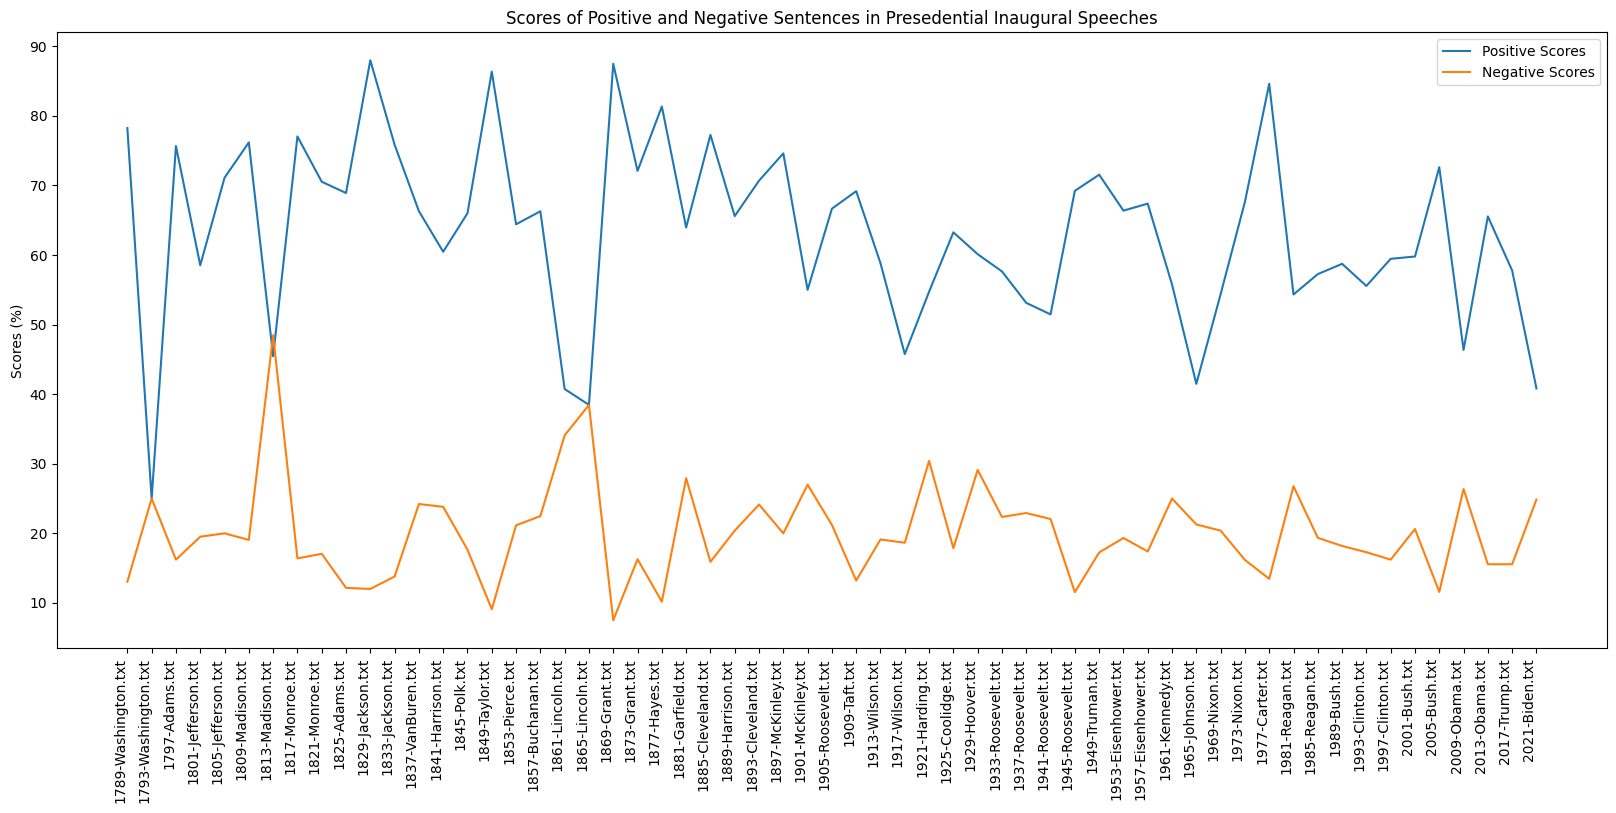

In [ ]:
# Do part 1(a) here
inaugurals = inaugural.fileids()

sia = SentimentIntensityAnalyzer()
pos_scores = []
neg_scores = []
speeches = []

for speech in inaugurals:
  raw_text = inaugural.raw(speech)
  sentences = sent_tokenize(raw_text)

  pos_count = 0
  neg_count = 0

  for sentence in sentences:
    total = sia.polarity_scores(sentence)
    score = total['compound']

    if score > 0.05:
      pos_count += 1
    elif score < -0.05:
      neg_count += 1

  sentence_total = len(sentences)
  pos_scores.append((pos_count / sentence_total) * 100)
  neg_scores.append((neg_count / sentence_total) * 100)
  speeches.append(speech)

print(pos_scores)
print(neg_scores)
x = np.arange(len(speeches))
plt.figure(figsize=(20,8))
plt.plot(x, pos_scores, label='Positive Scores')
plt.plot(x, neg_scores, label='Negative Scores')

plt.xticks(x, speeches, rotation=90, ha='right')
plt.ylabel('Scores (%)')
plt.title('Scores of Positive and Negative Sentences in Presedential Inaugural Speeches')
plt.legend()
plt.show()

No speech is more negative than positive, but maddison's speech is the closest with about a 50/50.



### Part 2: Happily Ever After?

Last assignment, I had you extracting proper nouns from text, and making them into bigrams, because we hoped those would correspond to people in the novel.

This is a very simple version of a technique called Named Entity Recognition (NER).

NER works in much the same way that Part Of Speech tagging, or Stemming works. There are very simple rules, and lists of important words, that work together to signal when something is a particular type of named entity. Named Entities (NE) come in different forms. Some of the most common are below:

* Person (PER) - Person entities are limited to humans.
* Organization (ORG) - Organization entities are limited to corporations, agencies,
and other groups of people.
* Geo-political Entity (GPE) - GPE entities are geographical regions defined by
political and/or social groups.
* Location (LOC) - Location entities are limited to geographical entities.
* Facility (FAC) - Facility entities are limited to buildings and other permanent manmade structures.


It turns out that there is a Named Entity package inside the NLTK. Notice a pattern yet? I get you to do something the hard way, and THEN tell you how you might really do it.

I'm going to use the text of Dracula just like last week, to show you how the NE Chunker (as it's called) works. The output printed below SHOULD be a list of people, and a list of entity types.

BUT - never forget, it is NOT 100% accurate. We still have to account for mistakes the automatic system makes. AND it doesn't handle all situations. We'll talk about this later.

In [ ]:
# Import NLTK, download resources

import nltk
import urllib.request


In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
# Get the dracula text, and cut off the project gutenberg
# boiler plate text from the beginning and the end

fileName = "http://www.gutenberg.org/cache/epub/345/pg345.txt"

response = urllib.request.urlopen(fileName)
data = response.read()      # a `bytes` object
dracula_text = data.decode('utf-8') # a `str`; this step can't be used if data is binary

start_book = dracula_text.find("*** START OF THIS PROJECT GUTENBERG EBOOK")
start_index = dracula_text.find('***',start_book+1)
start_index = start_index + 3

end_index = dracula_text.find("*** END OF THIS PROJECT GUTENBERG EBOOK")

text = dracula_text[start_index:end_index]


In [ ]:
# Here's the three steps
# (1) Tokenize the text
# (2) POS tag the tokens
# (3) Run the NE Chunker, that tries to identify named entities in the tokens

# Look at the output. The key to seeing that there is a section of text
# that is a NE is the word Tree, meaning what follows is part of a
# data structure (called Tree), that captures the span of the named
# entities. You should see the first Tree below is of type PERSON
# and what follows is a list of the entities, and their tags, that are
# part of this person entity.

tokens = nltk.word_tokenize(text)
tags = nltk.pos_tag(tokens)
namedEnt = nltk.ne_chunk(tags)
print(namedEnt[:50])


[('START', 'NNP'), ('OF', 'IN'), Tree('ORGANIZATION', [('THE', 'NNP')]), Tree('ORGANIZATION', [('PROJECT', 'NNP')]), ('GUTENBERG', 'NNP'), ('EBOOK', 'NNP'), ('DRACULA', 'NNP'), ('*', 'NNP'), ('*', 'NNP'), ('*', 'NNP'), ('DRACULA', 'NNP'), ('_by_', 'NNP'), Tree('PERSON', [('Bram', 'NNP'), ('Stoker', 'NNP')]), ('[', 'NNP'), ('Illustration', 'NNP'), (':', ':'), ('colophon', 'NN'), (']', 'VBZ'), Tree('ORGANIZATION', [('NEW', 'NNP')]), ('YORK', 'NNP'), ('GROSSET', 'NNP'), ('&', 'CC'), Tree('ORGANIZATION', [('DUNLAP', 'NNP'), ('_Publishers_', 'NNP'), ('Copyright', 'NNP')]), (',', ','), ('1897', 'CD'), (',', ','), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), ('of', 'IN'), Tree('GPE', [('America', 'NNP')]), (',', ','), ('according', 'VBG'), ('to', 'TO'), ('Act', 'NNP'), ('of', 'IN'), Tree('ORGANIZATION', [('Congress', 'NNP')]), (',', ','), ('by', 'IN'), Tree('PERSON', [('Bram', 'NNP'), ('Stoker', 'NNP')]), ('[', 'NNP'), ('_All', 'NNP'), ('rights', 'NNS'), 

In [ ]:
# NOW we want to extract the NEs from the list, above
# Here's the algorithm
# If the tuple in the list is of type Tree
# We know it's an entity of some kind
# That means we KNOW it has some properties
# It has a label (that's what PERSON is)
# And it's followed by a list of (word,tag) tuples
# I just need to extract the words, and combine them back together


# This Tree thing is a specific NLTK data structure

from nltk.tree import Tree


# I'm going to store all different PERSONs I see
# AND all the different label types the NE Chunker finds in this text

labels = []
people = []

# Now run my algorithm, above

for tup in namedEnt:
  if type(tup)==Tree:

    # First, figure out the label

    entityType = tup.label()
    labels.append(entityType)

    if entityType == 'PERSON':

      # The real words of this entity are in the first position in the tuple
      # I need to get them, and add them into a list of words
      # AND then join those words together to make a string

      entityName = [word for word,tag in tup]
      wholeEntityName = ' '.join(entityName)
      people.append(wholeEntityName)

print('The set of people:',set(people))
print('The set of unique NE labels is:',set(labels))

The set of people: {'Dress', 'Steinkoff', 'Miss Lucy', 'Breakfast', 'Listen', 'Traveller', 'Poor Mina', 'Guiliano', 'Doolittle', 'East Elliot Place', 'Somehow', 'Mr. Quincey Morris', 'Andres', 'Captain Donelson', 'George Canon', 'Miss Mina Murray', 'Quincey Morris', 'Mr. Renfield', 'Gabriel', 'Sir', 'Mr. Jonathan', 'Surely God', 'Young', 'Domine', 'Mr. Bloxam', 'Mind', 'Peter Farley', 'Dear', 'Thor', 'Plain Vanilla', 'Runswick', 'Great Walworth', 'Jamrach', '_He_', 'Abraham Van', 'Say', 'Olgaren', '_Rufus Smith', 'Voivode', 'Great Northern Railway', 'Castle', 'Rents', 'Sacred Wafer', 'Monster', '_Omnia Romæ', 'John Paxton', 'Mr. Smollet', 'Great God', 'Jonathan Harker', 'Lucy Westenra', 'Poor Lucy', 'Email', 'Carfax', 'Great Scott', 'Madam', 'Unclean', 'Arlington Street', 'Renfield', 'Hyde Park Corner', 'Isn', 'Sacred', 'Jack Smollet', 'Hardy', 'Paterson', 'Mulgrave Woods', 'God', 'Andrew Woodhouse', 'Nordau', 'Journal How', 'Miss Murray', 'Project Gutenberg', 'Mr. Marquand', 'Edward S


(a) Last week, you tried to find these names, and then generated interactions between them. We could do the same here, and compare our graph to the one generated last week, but let's explore something different.

I want you to apply a counter to the list of people names extracted above, and print the 6 most common.

Using the six most common names, I want you to:

* Go through the text of Dracula a sentence at a time
* Determine the polarity of each sentence
* If any of the six people from above appear in the sentence, keep a running total in a list of their polarity score, just like the score of mentions last week.
* If they do NOT appear in a particular sentence, simply append the score they had already (see my example below)
* The lists for all individuals should be the same length, and the same length as the number of sentences in the text
  * NOTE: You need only worry about exact matches. For instance, if one of the six is 'Madam Mina', you need only worry about exact matches for 'Madam Mina', not 'Madam' or 'Mina' on its own.

Example:

Imagine I'm tracking three names, Nick, Mina and Sarah

> "Nick is terrible. Mina is nice. Sarah is mean to Nick"

sentence1 compound score is -0.9

After the first sentence:
* 'Nick' = [-0.9]
* 'Mina' = [0]
* 'Sarah' = [0]

sentence2 compound score is 0.8

After the second sentence:
* 'Nick' = [-0.9,-0.9]
* 'Mina' = [0,0.8]
* 'Sarah' = [0,0]

sentence3 compound score is -0.5

After the third sentence:
* 'Nick' = [-0.9,-0.9,-1.4]
* 'Mina' = [0,0.8,0.8]
* 'Sarah' = [0,0,-0.5]

I think a dictionary is a great way to do this.

At the end, for each person in your dictionary, I want you to plot a graph. On the x axis should be sentence number (from 0 to the number of sentences in the text). The y axis will be culmulative polarity score.

Plot the scores per sentence for each of the six people on the graph as a line.

Answer the following questions. You should read the wikipedia page for Dracula, to check what happens, but try to answer first from the graph alone.

3. Do Jonathan and Mina end the novel happily?
4. Does something good or bad happen to Lucy halfway through the novel? What is it (you'll have to look this up)?
5. Print out the single most negative, and single most positive (as judged by compound score) sentences in the text.

In [ ]:
# Do part 2(a) here

c1 = Counter(people)
top_six = c1.most_common(6)

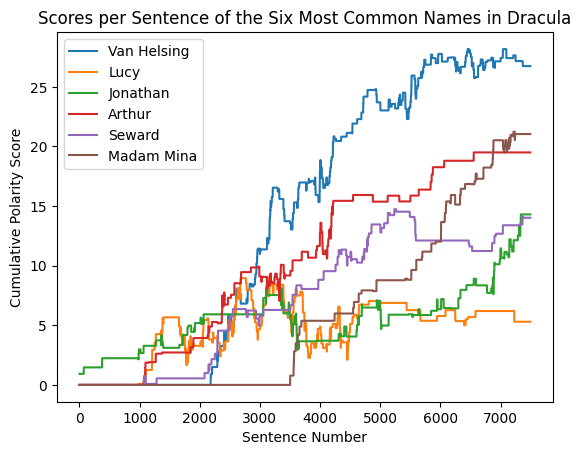

Most positive score (0.9886) is from the sentence "We are men
and are able to bear; but you must be our star and our hope, and we
shall act all the more free that you are not in the danger, such as we
are.”

All the men, even Jonathan, seemed relieved; but it did not seem to me
good that they should brave danger and, perhaps, lessen their
safety--strength being the best safety--through care of me; but their
minds were made up, and, though it was a bitter pill for me to swallow,
I could say nothing, save to accept their chivalrous care of me."

Most negative score (-0.9722) is from the sentence "There is no malign there, see, and so
it make hard that I must kill her in her sleep.” This turned my blood
cold, and it began to dawn upon me that I was accepting Van Helsing’s
theories; but if she were really dead, what was there of terror in the
idea of killing her?"


In [ ]:
sia = SentimentIntensityAnalyzer()

sentences = sent_tokenize(text)

most_pos_sentence = ""
most_pos_score = 0.0
most_neg_sentence = ""
most_neg_score = 0.0

polarities = {name: [] for name, _ in top_six}
current_polarities = {name: 0 for name, _ in top_six}

for sentence in sentences:
  total = sia.polarity_scores(sentence)['compound']

  if total > most_pos_score:
    most_pos_sentence = sentence
    most_pos_score = total

  if total < most_neg_score:
    most_neg_sentence = sentence
    most_neg_score = total


  for name, _ in top_six:
    if name in sentence:
      current_polarities[name] += total

    polarities[name].append(round(current_polarities[name],2))

for name, totals in polarities.items():
  plt.plot(totals, label=name)

plt.xlabel('Sentence Number')
plt.ylabel('Cumulative Polarity Score')
plt.title('Scores per Sentence of the Six Most Common Names in Dracula')
plt.legend()
plt.show()

print('Most positive score ({}) is from the sentence "{}"'.format(most_pos_score,most_pos_sentence))
print()
print('Most negative score ({}) is from the sentence "{}"'.format(most_neg_score,most_neg_sentence))

Mina and Jonathan do get a happy ending according to the graph as their end scores are high near the end.  They get married by the end of the novel.


Something bad does happen to Lucy, she becomes a vampire and is killed with a stake through her chest while she sleeps.




### Part 3: Outer space!

We've been using the NLTK, because it makes us understand how things are working. But the NLTK is somewhat out of date. Today, one of the most popular NLP libraries in Python is [Spacy](https://spacy.io/)

I'm not going to explain the spacy library, but I'll show you how it's used, and get you to do a simple task with it.

First, I'll show you how to import it, and initialize it.



In [ ]:
# import the spacy library
# and create an NLP pipeline, based on the core english model. There are other languages, as you can see here:
# https://spacy.io/models

import spacy
nlp = spacy.load('en_core_web_sm')

To make it work, we have to apply the piple line above to the text we want to process. Use whatever variable you have that contains the text of the dracula novel, above. For instance, I created the variable called text with the contents of dracula in it.

In [ ]:
# Define your text here

doc = nlp(text)

Once the text has been processed by the language pipeline, it will now have all kinds of annotations, including things like part of speech tags, noun phrases chunks, AND named entities. We'll just look at the latter for now. The code below goes through EVERY entity found in the novel, and prints them nicely. Named entities found by the system have the text of the entitity (.text), the string version of the label itself (.label_) and you can access an explanation of each label. There are other properties, such as where in the text exactly each entity is found.

I would like you to:
- go through the entities found above, and create a list of ONLY those identified as PERSON
- append each person to a list
- that you can then run through a counter, to see WHO are the top 20 most frequent people mentioned in Dracula
- compare this list to others you've generated from the NLTK. Is it better, worse or more or less the same?

In [ ]:
the_people = []
for ent in doc.ents:
  if ent.label_ == "PERSON":
    the_people.append(ent.text)

people_counter = Counter(the_people)
top_twenty_appearances = people_counter.most_common(20)
print(top_twenty_appearances)


[('Lucy', 266), ('Van Helsing', 266), ('Mina', 179), ('Jonathan', 167), ('Arthur', 133), ('Harker', 91), ('Seward', 77), ('Quincey', 53), ('John', 50), ('Morris', 47), ('Project Gutenberg', 47), ('Renfield', 45), ('Seward’s', 27), ('Dracula', 22), ('Letter', 20), ('Hawkins', 18), ('Lucy Westenra', 17), ('Quincey Morris', 17), ('Czarina Catherine', 17), ('Jonathan Harker’s', 16)]


All 6 from part 2 are in the top 20.  The results are more or less the same as the results from the other nltk results.